In [1]:
import os
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
len_min = 3

In [2]:
disease = 'multiple_myeloma'
file_name = 'ehr-shuffle.csv'
date_time_folder = '2018-9-18-19-51-11' 

data_folder = os.path.expanduser('~/data1/complex_disorders/%s/cohorts/%s' % (disease, date_time_folder))

with open(os.path.join(data_folder, file_name)) as f:
    rd = csv.reader(f)
    ehr_shuffle = {}
    for r in rd:
        ehr_shuffle.setdefault(r[0], list()).extend(r[1::])

In [3]:
l = []
for mrn in ehr_shuffle:
    l.append(len(ehr_shuffle[mrn]))
np.mean(l)

101.90029266323545

In [4]:
count = 0
for ll in l:
    if ll<3:
        count += 1
print("{0} of {1} patients have less than 3 records".format(count, len(l)))

595 of 9909 patients have less than 3 records


In [15]:
print("The sequence length ranges from {0} to {1}".format(min(l), max(l)))

The sequence length ranges from 1 to 3589


(array([7.440e+03, 1.111e+03, 4.830e+02, 2.920e+02, 1.860e+02, 1.040e+02,
        7.300e+01, 4.500e+01, 5.000e+01, 2.700e+01, 2.300e+01, 1.700e+01,
        1.300e+01, 1.100e+01, 6.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        7.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 1.00666667e+02, 2.00333333e+02, 3.00000000e+02,
        3.99666667e+02, 4.99333333e+02, 5.99000000e+02, 6.98666667e+02,
        7.98333333e+02, 8.98000000e+02, 9.97666667e+02, 1.09733333e+03,
        1.19700000e+03, 1.29666667e+03, 1.39633333e+03, 1.49600000e+03,
        1.59566667e+03, 1.69533333e+03, 1.79500000e+03, 1.89466667e+03,
        1.99433333e+03, 2.09400000e+03, 2.19366667e+03, 2.29333333e+03,
        2.39300000e+03, 2.49266667e+03, 2.59233333e+03, 2.69200000e+03,
        2.79166667e+03, 2.89133333e+03, 2.99100000

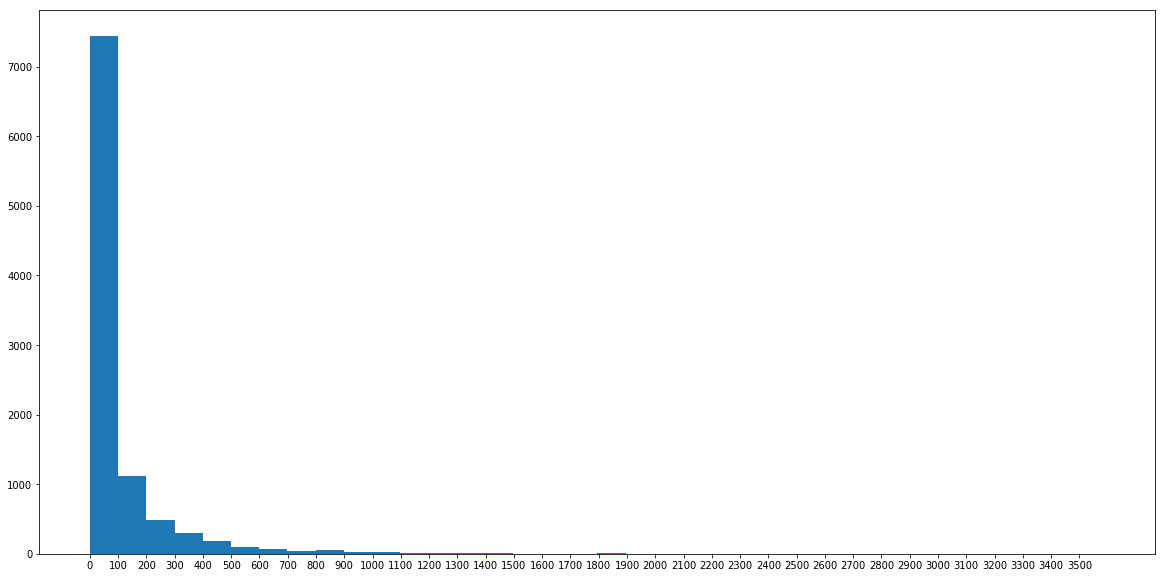

In [14]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(0, max(l), 100))
plt.hist(l, bins = 36)

In [17]:
with open(os.path.join(data_folder, 'list_mrnToDrop.csv'), 'w') as f:
    wr = csv.writer(f, delimiter=',')
    discard_list = []
    for mrn in ehr_shuffle:
        if len(ehr_shuffle[mrn]) < len_min:
            discard_list.append(mrn)
    wr.writerow(discard_list)

In [22]:
print("We are dropping {0} out of {1} patients".format(len(discard_list), len(ehr_shuffle)))

We are dropping 595 out of 9909 patients
